# SVM

## Necessary libraries

In [1]:
%pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


## Load the data and define variables

In [2]:
# Taining and testing data
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

# Size of the images
image_width = 28
image_height = 28

In [3]:
# training images
X = np.array(train.drop('label', axis=1))
# training labels
y = np.array(train['label'])

# number of examples
m = len(y)

# normalize the data
# Pixel values typically range from 0 to 255.
# Dividing by 255.0 scales the data to a [0, 1] range.
# Normalization improves the performance and convergence speed of many machine learning algorithms

pixel_max_value = 255.0

X = np.array(X , dtype='float')/ pixel_max_value

# number of different labels
n_classes = len(np.unique(y))

# we get 24 instead of 26 labels because we do not have "j" and "z" samples (maybe because they are movement signals).
# in order to not get empty labels lets rename the labels
for i in range(len(y)):
    if y[i] > 8:
        y[i] -= 1

print(f'Number of training examples: {m}')
print(f'Number of features: {X.shape[1]}')
print(f'Number of classes: {n_classes}')
print(f'X_shape: {X.shape}')
print(f'y_shape: {y.shape}')


Number of training examples: 27455
Number of features: 784
Number of classes: 24
X_shape: (27455, 784)
y_shape: (27455,)


## Model Test Data

In [4]:
X_test = np.array(test.drop('label', axis=1))
y_test = np.array(test['label'])

# number of test examples
m_test = len(y_test)

pixel_max_value = 255.0

X_test = np.array(X_test , dtype='float')/ pixel_max_value

n_test_classes = len(np.unique(y_test))

for i in range(len(y_test)):
    if y_test[i] > 8:
        y_test[i] -= 1


print(f'Number of test examples: {m_test}')
print(f'Number of test features: {X_test.shape[1]}')
print(f'Number of test classes: {n_test_classes}')
print(f'X_shape: {X_test.shape}')
print(f'y_shape: {y_test.shape}')

Number of test examples: 7172
Number of test features: 784
Number of test classes: 24
X_shape: (7172, 784)
y_shape: (7172,)


## Split the data into training and validation sets

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of training examples: ", len(y_train))
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("Number of validation examples: ", len(y_val))
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

Number of training examples:  21964
X_train shape:  (21964, 784)
y_train shape:  (21964,)
Number of validation examples:  5491
X_val shape:  (5491, 784)
y_val shape:  (5491,)


### Hyperparameter tuning

The task is to use the validation set Xval, yval to determine the best C and  $\sigma$ parameters.

In [9]:
def dataset3Params(X, y, Xval, yval,c_vals,gamma_vals):
    """
    dataset3Params returns the optimal C and gamma(1/sigma) based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    
    for C in c_vals:
        for gamma in gamma_vals:
            classifier = SVC(kernel='rbf',C=C,gamma=gamma)
            classifier.fit(X,y)
            score = classifier.score(Xval,yval)

            if score >= acc:
                acc =score
                best_C =C
                best_gamma=gamma

    return best_C, best_gamma

In [10]:
gamma_vals = [0.001, 0.01, 0.035, 0.1]
c_vals = [ 1, 10, 100]

C, gamma = dataset3Params(X_train, y_train.ravel(), X_val, y_val.ravel(),c_vals,gamma_vals)
print("The best C is: ", C)
print("The best gamma is: ", gamma)

The best C is:  100
The best gamma is:  0.035


## Test Model

In [11]:
classifier = SVC(kernel='rbf', C=C, gamma=gamma)
classifier.fit(X_train, y_train.ravel())

predictionsTrain = classifier.predict(X_train)
print(f'Accuracy Train: {accuracy_score(y_train, predictionsTrain)*100}')

predictionsVal = classifier.predict(X_val)
print(f'Accuracy Val: {accuracy_score(y_val, predictionsVal)*100}')

predictions = classifier.predict(X_test)
print(f'Accuracy Test: {accuracy_score(y_test, predictions)*100}')

Accuracy Train: 100.0
Accuracy Val: 100.0
Accuracy Test: 83.79810373675404


## Metrics

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       1.00      0.99      1.00       432
           2       0.86      0.99      0.92       310
           3       0.93      1.00      0.96       245
           4       0.93      0.99      0.96       498
           5       0.72      0.83      0.77       247
           6       0.93      0.93      0.93       348
           7       0.99      0.93      0.96       436
           8       0.80      0.84      0.82       288
           9       0.75      0.54      0.63       331
          10       0.91      1.00      0.95       209
          11       0.87      0.70      0.78       394
          12       0.89      0.68      0.77       291
          13       1.00      0.82      0.90       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       0.30      0.50      0.37       144
          17       0.71    

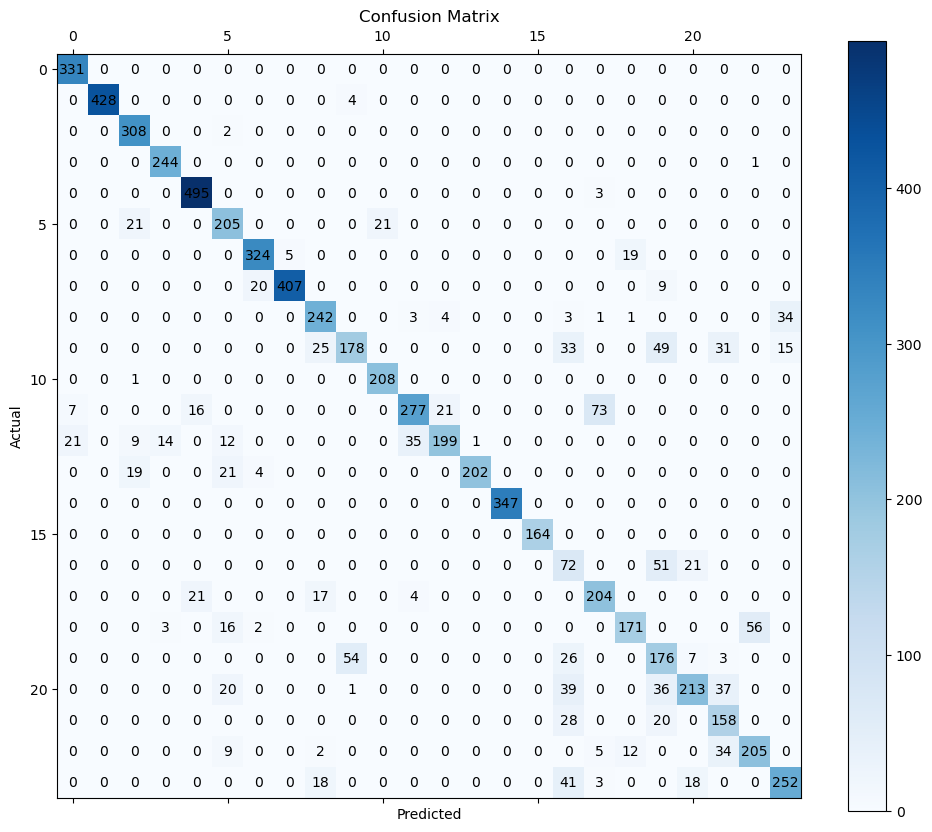

In [12]:
# Classification Report
print(classification_report(y_test, predictions))

# Confusion Matrix
confusion = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(12, 10)) 
cax = ax.matshow(confusion, cmap='Blues')
fig.colorbar(cax)

for (i, j), val in np.ndenumerate(confusion):
    ax.text(j, i, f'{val}', ha='center', va='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
